# Matching of haloes to clusters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy import stats

from match_clusters import *


%load_ext autoreload
%autoreload 2
%matplotlib inline

## Plot $R - \log M$ as a function of significance

In [79]:
cat = csiborgtools.read.CSiBORG2Catalogue(
    17417, 99, "main", bounds={"totmass": (1e12, None)})
pos = cat["cartesian_pos"]
logmass = np.log10(cat["totmass"])

model = csiborgtools.match.MatchingProbability(pos, logmass)

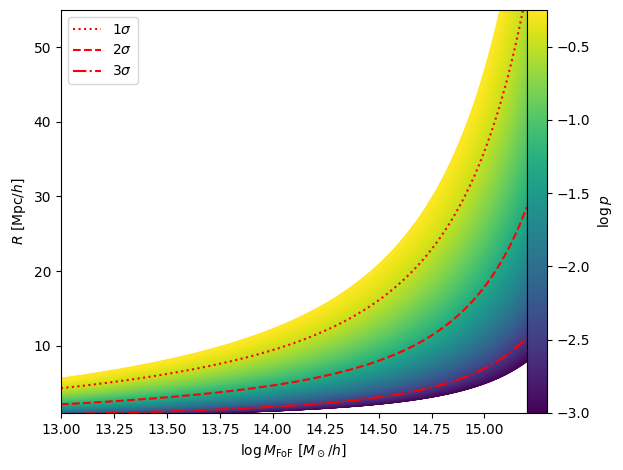

In [78]:
xrange = np.linspace(13, 15.2, 250)
log_p_values = np.linspace(-3, -0.25, 1000)
cmap = cm.viridis
norm = Normalize(vmin=log_p_values.min(), vmax=log_p_values.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Necessary for the colorbar to use the ScalarMappable


fig, ax = plt.figure(), plt.gca()
for p in log_p_values:
    y = [model.inverse_cdf(10**p, x) for x in xrange]
    ax.plot(xrange, y, color=cmap(norm(p)))

ls = [":", "--", "-."]
for n in range(1, 4):
    p = stats.norm.sf(n) * 2
    y = [model.inverse_cdf(p, x) for x in xrange]
    ax.plot(xrange, y, color="red", label=fr"${n}\sigma$", linestyle=ls[n-1])

ax.set_xlabel(r"$\log M_{\mathrm{FoF}} ~ [M_\odot / h]$")
ax.set_ylabel(r"$R ~ [\mathrm{Mpc} / h]$")
ax.set_ylim(1, 55)
ax.legend()
cbar = fig.colorbar(sm, ax=ax, label=r"$\log p$", pad=0)
ax.set_xlim(xrange.min(), xrange.max())
fig.tight_layout()
fig.savefig("../../plots/matching_probability.png", dpi=450)
fig.show()

## Test matching

In [95]:
simname = "csiborg2_varysmall"
bounds = {"totmass": (1e12, None)}

cats = open_cats(simname, bounds)

Opening catalogues:   0%|          | 0/20 [00:00<?, ?it/s]

Opening catalogues: 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]


In [96]:
model = csiborgtools.match.MatchCatalogues(cats)

100%|██████████| 20/20 [00:04<00:00,  4.90it/s]


In [109]:
cluster = csiborgtools.clusters["Coma"]
x0 = cluster.cartesian_pos(cats[0].boxsize)
logmass0 = np.log10(cluster.mass)
print(logmass0)

14.94250410616808


In [110]:
ps, indxs = model(x0, logmass0, pvalue_threshold=0.05, rmax=30)
print(indxs)

Matching catalogues: 100%|██████████| 20/20 [00:00<00:00, 556.37it/s]

{0: 3, 1: 3, 2: 2, 3: 3, 4: 3, 5: 3, 6: 2, 7: 2, 8: 3, 9: 3, 10: 2, 11: 2, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 2, 19: 3}


In [111]:
dx = np.asarray([np.linalg.norm(cats[i]["cartesian_pos"][indx] - x0) for i, indx in indxs.items()])
logM = np.asarray([np.log10(cats[i]["totmass"][indx]) for i, indx in indxs.items()])

In [112]:
ps

{0: 1.7277742548227337e-05,
 1: 2.3773062338916517e-05,
 2: 1.649682964910415e-05,
 3: 2.2792332201482246e-05,
 4: 2.0781930465618714e-05,
 5: 1.998976678019293e-05,
 6: 1.9442165546501577e-05,
 7: 1.544348716120414e-05,
 8: 2.1642747228156622e-05,
 9: 1.8945898574984632e-05,
 10: 2.0662255376224792e-05,
 11: 1.7147290344965427e-05,
 12: 1.9652646111256722e-05,
 13: 2.681115460911876e-05,
 14: 2.087873974021548e-05,
 15: 2.025383691772742e-05,
 16: 2.3353221836774907e-05,
 17: 2.0315974653239977e-05,
 18: 1.8199303817634238e-05,
 19: 2.0844772995021188e-05}

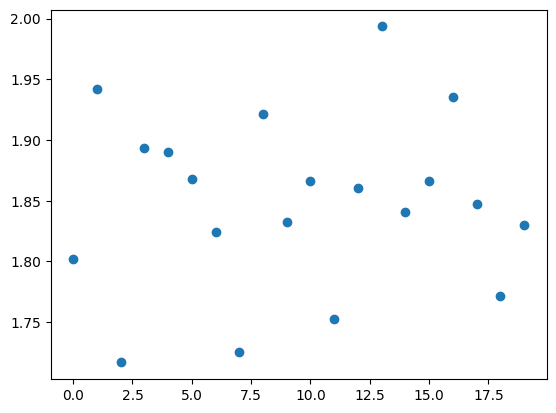

In [114]:
plt.figure()
plt.scatter(np.arange(len(dx)), dx)
plt.show()

In [98]:
ps, dlog, indxs = model.cdf_per_halo(x0, logmass0)
r = np.linalg.norm(pos - x0.reshape(1, -1), axis=1)

In [99]:
p, k = model.match_halo(x0, logmass0, pvalue_threshold=0.1, max_absdlogmass=1)
print(p, k, logmass[k])

None None [[15.430657 15.189978 15.118925 ... 12.098506 12.76248  12.336433]]


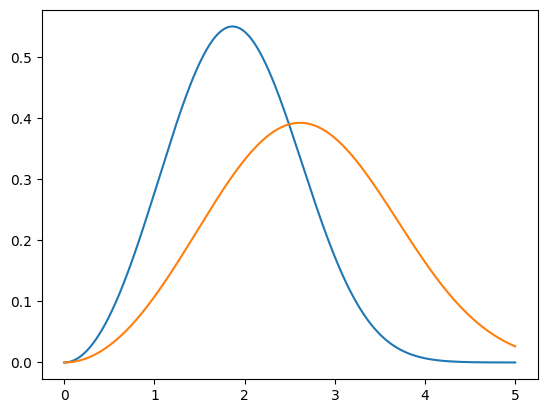

In [111]:
plt.figure()
plt.plot(xrange, y)
plt.plot(xrange, y2)
plt.show()

In [71]:
x, y = model.pdf_marginalized(xrange, 14.0, 42.5, 4)